In [10]:
import numpy as np
import pandas as pd

import os
import json
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
data_path = Path('../data/01_raw')
ss_path = data_path / 'sampleSubmission.csv'
train_path = data_path / 'train.csv'
test_path = data_path / 'test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
ss = pd.read_csv(ss_path)

In [4]:
target = train_df["target"]
dict_a = {"Class_1": 0,
          "Class_2": 1,
          "Class_3": 2,
          "Class_4": 3,
          "Class_5": 4,
          "Class_6": 5,
          "Class_7": 6,
          "Class_8": 7,
          "Class_9": 8,
         }
target = target.map(dict_a)
train_df = train_df.drop(["target", "id"], axis=1)

In [5]:
train_df.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [6]:
df_log = np.log1p(train_df)

In [7]:
df_log.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0.693147,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.693147,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.693147,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.693147,0.0,0.0,0.693147,1.94591,0.693147,1.791759,0.000000,0.0,0.693147,...,3.135494,0.000000,0.693147,1.098612,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.693147,0.000000,0.000000,0.0,0.0,0.693147,0.0,0.0,0.0


In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(df_log[["feat_11", "feat_60", "feat_34", "feat_90", "feat_15", "feat_14"]])
train_pca

array([[-1.28764351, -0.20843374],
       [-0.16414233,  0.20946019],
       [-0.16414233,  0.20946019],
       ...,
       [ 0.32082529, -0.20219505],
       [-0.16414233,  0.20946019],
       [-0.37192235,  0.58834459]])

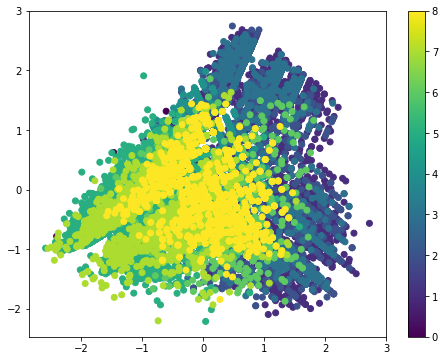

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.scatter(train_pca[:,0], train_pca[:, 1], c=target)
plt.colorbar()
plt.show()

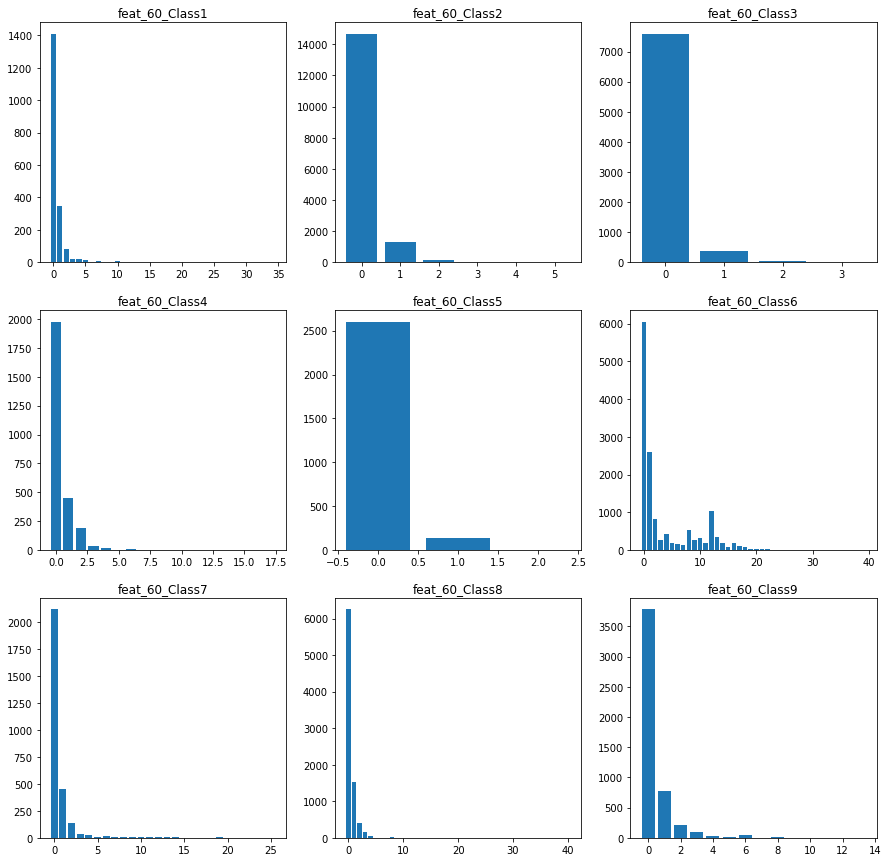

In [23]:
fig, axs = plt.subplots(3, 3, figsize=(5 * 3, 5 * 3))
num = 60
for i in range(9):
    data = train_df[target == i][f"feat_{num}"]
    ax = axs[i // 3][i % 3]
    memo = data.value_counts().sort_index()
    # print(data)
    ax.set_title(f"feat_{num}_Class{i+1}")
    ax.bar(list(memo.index), memo)